# Self-Driving Car Engineer Nanodegree


## Project: **Finding Lane Lines on the Road** 
***
In this project, you will use the tools you learned about in the lesson to identify lane lines on the road.  You can develop your pipeline on a series of individual images, and later apply the result to a video stream (really just a series of images). Check out the video clip "raw-lines-example.mp4" (also contained in this repository) to see what the output should look like after using the helper functions below. 

Once you have a result that looks roughly like "raw-lines-example.mp4", you'll need to get creative and try to average and/or extrapolate the line segments you've detected to map out the full extent of the lane lines.  You can see an example of the result you're going for in the video "P1_example.mp4".  Ultimately, you would like to draw just one line for the left side of the lane, and one for the right.

In addition to implementing code, there is a brief writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-LaneLines-P1/blob/master/writeup_template.md) that can be used to guide the writing process. Completing both the code in the Ipython notebook and the writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/322/view) for this project.

---
Let's have a look at our first image called 'test_images/solidWhiteRight.jpg'.  Run the 2 cells below (hit Shift-Enter or the "play" button above) to display the image.

**Note: If, at any point, you encounter frozen display windows or other confounding issues, you can always start again with a clean slate by going to the "Kernel" menu above and selecting "Restart & Clear Output".**

---

**The tools you have are color selection, region of interest selection, grayscaling, Gaussian smoothing, Canny Edge Detection and Hough Tranform line detection.  You  are also free to explore and try other techniques that were not presented in the lesson.  Your goal is piece together a pipeline to detect the line segments in the image, then average/extrapolate them and draw them onto the image for display (as below).  Once you have a working pipeline, try it out on the video stream below.**

---

<figure>
 <img src="examples/line-segments-example.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above) after detecting line segments using the helper functions below </p> 
 </figcaption>
</figure>
 <p></p> 
<figure>
 <img src="examples/laneLines_thirdPass.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your goal is to connect/average/extrapolate line segments to get output like this</p> 
 </figcaption>
</figure>

**Run the cell below to import some packages.  If you get an `import error` for a package you've already installed, try changing your kernel (select the Kernel menu above --> Change Kernel).  Still have problems?  Try relaunching Jupyter Notebook from the terminal prompt.  Also, consult the forums for more troubleshooting tips.**  

## Import Packages

In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

## Read in an Image

This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


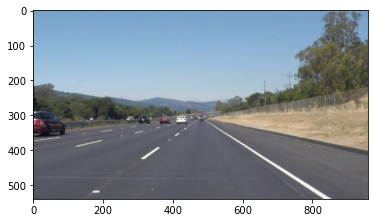

In [2]:
#reading in an image
image = mpimg.imread('test_images/solidWhiteRight.jpg')

#printing out some stats and plotting
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')

## Ideas for Lane Detection Pipeline

**Some OpenCV functions (beyond those introduced in the lesson) that might be useful for this project are:**

`cv2.inRange()` for color selection  
`cv2.fillPoly()` for regions selection  
`cv2.line()` to draw lines on an image given endpoints  
`cv2.addWeighted()` to coadd / overlay two images  
`cv2.cvtColor()` to grayscale or change color  
`cv2.imwrite()` to output images to file  
`cv2.bitwise_and()` to apply a mask to an image

**Check out the OpenCV documentation to learn about these and discover even more awesome functionality!**

## Helper Functions

Below are some helper functions to help get you started. They should look familiar from the lesson!

In [3]:
import math

def draw_lines(img, lines, color=[255, 0, 0], thickness=2):
    """
    NOTE: this is the function you might want to use as a starting point once you want to 
    average/extrapolate the line segments you detect to map out the full
    extent of the lane (going from the result shown in raw-lines-example.mp4
    to that shown in P1_example.mp4).  
    
    Think about things like separating line segments by their 
    slope ((y2-y1)/(x2-x1)) to decide which segments are part of the left
    line vs. the right line.  Then, you can average the position of each of 
    the lines and extrapolate to the top and bottom of the lane.
    
    This function draws `lines` with `color` and `thickness`.    
    Lines are drawn on the image inplace (mutates the image).
    If you want to make the lines semi-transparent, think about combining
    this function with the weighted_img() function below
    """
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)

def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img, lines

# Python 3 has support for cool math symbols.
def weighted_img(img, initial_img, α=0.8, β=1., γ=0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.
    
    `initial_img` should be the image before any processing.
    
    The result image is computed as follows:
    
    initial_img * α + img * β + γ
    NOTE: initial_img and img must be the same shape!
    """
    return cv2.addWeighted(initial_img, α, img, β, γ)

## Test Images

Build your pipeline to work on the images in the directory "test_images"  
**You should make sure your pipeline works well on these images before you try the videos.**

In [4]:
import os
os.listdir("test_images/")

['solidWhiteRight_gray.jpg',
 'solidWhiteRight_roi.jpg',
 'solidYellowLeft.jpg',
 'solidYellowCurve2.jpg',
 'solidWhiteRight_lines.jpg',
 'solidYellowCurve.jpg',
 'solidWhiteRight.jpg',
 'solidWhiteRight_edges.jpg',
 'whiteCarLaneSwitch.jpg',
 'solidWhiteCurve.jpg',
 'line_segments.png']

## Build a Lane Finding Pipeline



Build the pipeline and run your solution on all test_images. Make copies into the `test_images_output` directory, and you can use the images in your writeup report.

Try tuning the various parameters, especially the low and high Canny thresholds as well as the Hough lines parameters.

In [5]:
def region_of_interest(image):
    
    mask = np.zeros_like(image)
    ignore_mask_color = 255

    imshape = image.shape

    percentage_left_right = 0.45
    percentage_top = 0.6

    vertices = np.array([[(0, imshape[0]),
                          (imshape[1] * percentage_left_right, imshape[0] * percentage_top),
                          (imshape[1] * (1 - percentage_left_right), imshape[0] * percentage_top),
                          (imshape[1], imshape[0])]], dtype=np.int32)
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    masked_edges = cv2.bitwise_and(image, mask)

    return masked_edges

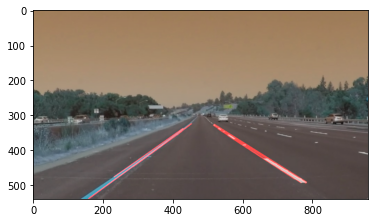

In [6]:
import time
import os
%matplotlib inline

def extract_lines(frame):
    
    # Smooth the image to reduce artifacts
    kernel_size = 5
    smoothened = cv2.GaussianBlur(frame, (kernel_size, kernel_size), cv2.BORDER_DEFAULT)
    
    # Extract the edges
    low_threshold = 50
    high_threshold = 150
    edges = cv2.Canny(smoothened, low_threshold, high_threshold)
    
    # Obtain the region of interest
    roi_image = region_of_interest(edges)
    
    # Obtain the lines, based on the canny image
    rho = 1
    theta = np.pi / 180
    threshold = 20
    min_line_length = 130
    max_line_gap = 100
    lines_image, lines = hough_lines(roi_image, rho, theta, threshold, min_line_length, max_line_gap)
    
    # ROI once more, to cut off the lines
    roi_image = region_of_interest(lines_image)
    
    return roi_image
    
for image_name in ["solidYellowLeft.jpg"] :#os.listdir("./test_images/"):
    
    left_coefs = []
    right_coefs = []
    n_states = 60
    
    image = cv2.imread("./test_images/" + image_name)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Obtain the lines
    lines = extract_lines(gray_image)
    
    # Combine it with the original images
    combined = weighted_img(lines, image)
    
    plt.imshow(combined)
    plt.show()
    
    cv2.imwrite("./test_images_output/" + image_name, combined)

## Test on Videos

In [7]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [8]:
def process_image(image):
    # Convert the image to gray scale, the pipeline requires this
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Obtain the lines
    lines = extract_lines(gray_image)
    
    # Combine it with the original image
    combined = weighted_img(lines, image)
    
    return combined

Let's try the one with the solid white lane on the right first ...

In [9]:
def test_video(video):
    output = 'test_videos_output/' + video
    ## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
    ## To do so add .subclip(start_second,end_second) to the end of the line below
    ## Where start_second and end_second are integer values representing the start and end of the subclip
    ## You may also uncomment the following line for a subclip of the first 5 seconds
    ##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
    clip1 = VideoFileClip("test_videos/" + video.replace("_lines", ""))
    clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
    %time clip.write_videofile(output, audio=False)
    
    HTML("""
    <video width="960" height="540" controls>
      <source src="{0}">
    </video>
    """.format(output))

In [10]:
from IPython.display import clear_output

videos = [
    "solidWhiteRight_lines.mp4",
    "solidYellowLeft_lines.mp4",
    "challenge_lines.mp4",
]

for video in videos:
    test_video(video)
    clear_output(wait=True)

t:   0%|          | 0/251 [00:00<?, ?it/s, now=None]

Moviepy - Building video test_videos_output/challenge_lines.mp4.
Moviepy - Writing video test_videos_output/challenge_lines.mp4



Moviepy - Done !
Moviepy - video ready test_videos_output/challenge_lines.mp4
CPU times: user 10.5 s, sys: 3.86 s, total: 14.4 s
Wall time: 5.58 s


In [11]:
HTML("""
    <video width="480" height="270" controls>
      <source src="{0}">
    </video>
    """.format('test_videos_output/' + "solidWhiteRight_lines.mp4"))

In [12]:
HTML("""
    <video width="480" height="270" controls>
      <source src="{0}">
    </video>
    """.format('test_videos_output/' + "solidYellowLeft_lines.mp4"))

In [13]:
HTML("""
    <video width="480" height="270" controls>
      <source src="{0}">
    </video>
    """.format('test_videos_output/' + "challenge_lines.mp4"))

## Improve the draw_lines() function

**At this point, if you were successful with making the pipeline and tuning parameters, you probably have the Hough line segments drawn onto the road, but what about identifying the full extent of the lane and marking it clearly as in the example video (P1_example.mp4)?  Think about defining a line to run the full length of the visible lane based on the line segments you identified with the Hough Transform. As mentioned previously, try to average and/or extrapolate the line segments you've detected to map out the full extent of the lane lines. You can see an example of the result you're going for in the video "P1_example.mp4".**

**Go back and modify your draw_lines function accordingly and try re-running your pipeline. The new output should draw a single, solid line over the left lane line and a single, solid line over the right lane line. The lines should start from the bottom of the image and extend out to the top of the region of interest.**

In [14]:
from sklearn.linear_model import HuberRegressor, LinearRegression, RANSACRegressor, TheilSenRegressor

left_coefs = []
right_coefs = []
n_states = 60

def draw_lines(img, lines, color=[255, 0, 0], thickness=5):
    global TheilSenRegressor, left_coefs, right_coefs

    # Find the slopes for each line
    slopes = np.array([((line[0][3]-line[0][1])/(line[0][2] - line[0][0])) for line in lines])
    
    # Extract all the x coordinates of the lines
    x_coords = lines[:, 0][:, [0, 2]]
    y_coords = lines[:, 0][:, [1, 3]]
    
    x_coords = x_coords[np.where(np.logical_and(np.abs(slopes) >= 0.5, np.abs(slopes) <= 0.8))]
    y_coords = y_coords[np.where(np.logical_and(np.abs(slopes) >= 0.5, np.abs(slopes) <= 0.8))]
    
    # Only use the slopes that point in the right direction
    slopes = slopes[np.where(np.logical_and(np.abs(slopes) >= 0.5, np.abs(slopes) <= 0.8))]
    
    left_x_coords = x_coords[slopes < 0].flatten().reshape(-1, 1)
    left_y_coords = y_coords[slopes < 0].flatten()
    right_x_coords = x_coords[slopes >= 0].flatten().reshape(-1, 1)
    right_y_coords = y_coords[slopes >= 0].flatten()
    
    # Only do a regression if there is data
    if len(left_x_coords) > 0 and len(right_x_coords) > 0:
    
        huber_left = TheilSenRegressor().fit(left_x_coords, -left_y_coords)
        huber_right = TheilSenRegressor().fit(right_x_coords, -right_y_coords)

        # Extract the coefficients and flip them, due to the orientiation
        left_coef = - huber_left.coef_[0]
        left_intercept = - huber_left.intercept_
        right_coef = - huber_right.coef_[0]
        right_intercept = - huber_right.intercept_
    
        # Keep a running median
        left_coefs.append((left_coef, left_intercept))

        if len(left_coefs) > n_states:
            left_coefs = left_coefs[1:]

        right_coefs.append((right_coef, right_intercept))
        if len(right_coefs) > n_states:
            right_coefs = right_coefs[1:]
            
    # Obtain the running coefs
    left_coef = np.median([coef[0] for coef in left_coefs])
    left_intercept = np.median([coef[1] for coef in left_coefs])
    right_coef = np.median([coef[0] for coef in right_coefs])
    right_intercept = np.median([coef[1] for coef in right_coefs])
    
    # Find the bottom intercepts for both lines
    left_bottom_intersect = ((img.shape[0] - left_intercept)/left_coef, img.shape[0])
    right_bottom_intersect = ((img.shape[0] - right_intercept)/right_coef, img.shape[0])
    left_top_intersect = ((0 - left_intercept)/left_coef, 0)
    right_top_intersect = ((0 - right_intercept)/right_coef, 0)
    
    # Convert them to integers
    left_bottom_intersect = (math.floor(left_bottom_intersect[0]), math.floor(left_bottom_intersect[1]))
    right_bottom_intersect = (math.floor(right_bottom_intersect[0]), math.floor(right_bottom_intersect[1]))
    left_top_intersect = (math.floor(left_top_intersect[0]), math.floor(left_top_intersect[1]))
    right_top_intersect = (math.floor(right_top_intersect[0]), math.floor(right_top_intersect[1]))
    
    # Add them to the frame
    cv2.line(img, left_bottom_intersect, left_top_intersect, color, thickness)
    cv2.line(img, right_bottom_intersect, right_top_intersect, color, thickness)

Now for the one with the solid yellow lane on the left. This one's more tricky!

In [15]:
left_coefs = []
right_coefs = []

test_video("solidWhiteRight.mp4")

t:   4%|▎         | 8/221 [00:00<00:02, 75.81it/s, now=None]

Moviepy - Building video test_videos_output/solidWhiteRight.mp4.
Moviepy - Writing video test_videos_output/solidWhiteRight.mp4



Moviepy - Done !
Moviepy - video ready test_videos_output/solidWhiteRight.mp4
CPU times: user 6.59 s, sys: 1.86 s, total: 8.45 s
Wall time: 3.24 s


In [16]:
left_coefs = []
right_coefs = []

test_video("example.mp4")

t:   1%|▏         | 9/698 [00:00<00:07, 88.68it/s, now=None]

Moviepy - Building video test_videos_output/example.mp4.
Moviepy - Writing video test_videos_output/example.mp4



Moviepy - Done !
Moviepy - video ready test_videos_output/example.mp4
CPU times: user 23 s, sys: 7.9 s, total: 30.9 s
Wall time: 11.7 s


In [17]:
left_coefs = []
right_coefs = []

test_video("solidYellowLeft.mp4")

t:   0%|          | 0/681 [00:00<?, ?it/s, now=None]

Moviepy - Building video test_videos_output/solidYellowLeft.mp4.
Moviepy - Writing video test_videos_output/solidYellowLeft.mp4



Moviepy - Done !
Moviepy - video ready test_videos_output/solidYellowLeft.mp4
CPU times: user 21.5 s, sys: 6.34 s, total: 27.9 s
Wall time: 10.7 s


In [18]:
left_coefs = []
right_coefs = []

test_video("challenge.mp4")

t:   0%|          | 0/251 [00:00<?, ?it/s, now=None]

Moviepy - Building video test_videos_output/challenge.mp4.
Moviepy - Writing video test_videos_output/challenge.mp4



Moviepy - Done !
Moviepy - video ready test_videos_output/challenge.mp4
CPU times: user 11.9 s, sys: 3.63 s, total: 15.5 s
Wall time: 6.04 s


## Writeup and Submission

If you're satisfied with your video outputs, it's time to make the report writeup in a pdf or markdown file. Once you have this Ipython notebook ready along with the writeup, it's time to submit for review! Here is a [link](https://github.com/udacity/CarND-LaneLines-P1/blob/master/writeup_template.md) to the writeup template file.


## Optional Challenge

Try your lane finding pipeline on the video below.  Does it still work?  Can you figure out a way to make it more robust?  If you're up for the challenge, modify your pipeline so it works with this video and submit it along with the rest of your project!

In [19]:
challenge_output = 'test_videos_output/challenge.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip3 = VideoFileClip('test_videos/challenge.mp4').subclip(0,5)
clip3 = VideoFileClip('test_videos/challenge.mp4')
challenge_clip = clip3.fl_image(process_image)
%time challenge_clip.write_videofile(challenge_output, audio=False)

t:   0%|          | 0/251 [00:00<?, ?it/s, now=None]

Moviepy - Building video test_videos_output/challenge.mp4.
Moviepy - Writing video test_videos_output/challenge.mp4



Moviepy - Done !
Moviepy - video ready test_videos_output/challenge.mp4
CPU times: user 12 s, sys: 3.81 s, total: 15.9 s
Wall time: 6.19 s


In [20]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challenge_output))